In [62]:
import requests

url = "https://www.gutenberg.org/files/11/11-0.txt"
response = requests.get(url)
text = response.text
print(text[:1000])

*** START OF THE PROJECT GUTENBERG EBOOK 11 ***

[Illustration]




Alice’s Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down the Rabbit-Hole
 CHAPTER II.    The Pool of Tears
 CHAPTER III.   A Caucus-Race and a Long Tale
 CHAPTER IV.    The Rabbit Sends in a Little Bill
 CHAPTER V.     Advice from a Caterpillar
 CHAPTER VI.    Pig and Pepper
 CHAPTER VII.   A Mad Tea-Party
 CHAPTER VIII.  The Queen’s Croquet-Ground
 CHAPTER IX.    The Mock Turtle’s Story
 CHAPTER X.     The Lobster Quadrille
 CHAPTER XI.    Who Stole the Tarts?
 CHAPTER XII.   Alice’s Evidence




CHAPTER I.
Down the Rabbit-Hole


Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into
the book her sister was reading, but it had no pictures or
conversations in it, “and what is the use of a book,” thought Alice
“without pictures or convers


In [77]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np


In [64]:
start = text.find("CHAPTER I.")
end = text.find("End of the Project Gutenberg EBook")
cleaned_text = text[start:end].strip()

lines = cleaned_text.splitlines()
filtered_lines = []

for line in lines:
    line_strip = line.strip().lower()

    if line_strip == "":
        continue
    if "contents" in line_strip:
        continue
    if line_strip.startswith("chapter") and "." in line_strip:
        continue
    if line_strip.startswith("*") or "[illustration" in line_strip:
        continue
    filtered_lines.append(line.strip())

final_cleaned_text = "\n".join(filtered_lines)

print("Content after cleaning:\n")
print(final_cleaned_text[:500])


Content after cleaning:

Down the Rabbit-Hole
Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into
the book her sister was reading, but it had no pictures or
conversations in it, “and what is the use of a book,” thought Alice
“without pictures or conversations?”
So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure of
making a daisy-chain would be worth


In [78]:
# nltk.download("punkt")
# nltk.download('punkt_tab')
# nltk.download("stopwords")
# nltk.download("wordnet")
# nltk.download("omw-1.4")

def clean_text_nlp(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)
    print("Tokens before removing stop words:", tokens[:30])

    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if t not in stop_words and len(t) > 1]
    print("Tokens after removing stop words:", tokens[:30])
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]

    return tokens
tokens = clean_text_nlp(final_cleaned_text)
print("Sample tokens:", tokens[:30])

Tokens before removing stop words: ['down', 'the', 'rabbithole', 'alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', 'and', 'of', 'having', 'nothing', 'to', 'do', 'once', 'or', 'twice', 'she', 'had', 'peeped']
Tokens after removing stop words: ['rabbithole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book', 'sister', 'reading', 'pictures', 'conversations', 'use', 'book', 'thought', 'alice', 'without', 'pictures', 'conversations', 'considering', 'mind', 'well', 'could', 'hot', 'day', 'made']
Sample tokens: ['rabbithole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book', 'sister', 'reading', 'picture', 'conversation', 'use', 'book', 'thought', 'alice', 'without', 'picture', 'conversation', 'considering', 'mind', 'well', 'could', 'hot', 'day', 'made']


In [79]:
cleaned_text_output = " ".join(tokens)
print(cleaned_text_output[:1000])

rabbithole alice beginning get tired sitting sister bank nothing twice peeped book sister reading picture conversation use book thought alice without picture conversation considering mind well could hot day made feel sleepy stupid whether pleasure making daisychain would worth trouble getting picking daisy suddenly white rabbit pink eye ran close nothing remarkable alice think much way hear rabbit say oh dear oh dear shall late thought afterwards occurred ought wondered time seemed quite natural rabbit actually took watch waistcoatpocket looked hurried alice started foot flashed across mind never seen rabbit either waistcoatpocket watch take burning curiosity ran across field fortunately time see pop large rabbithole hedge another moment went alice never considering world get rabbithole went straight like tunnel way dipped suddenly suddenly alice moment think stopping found falling deep well either well deep fell slowly plenty time went look wonder going happen next first tried look ma

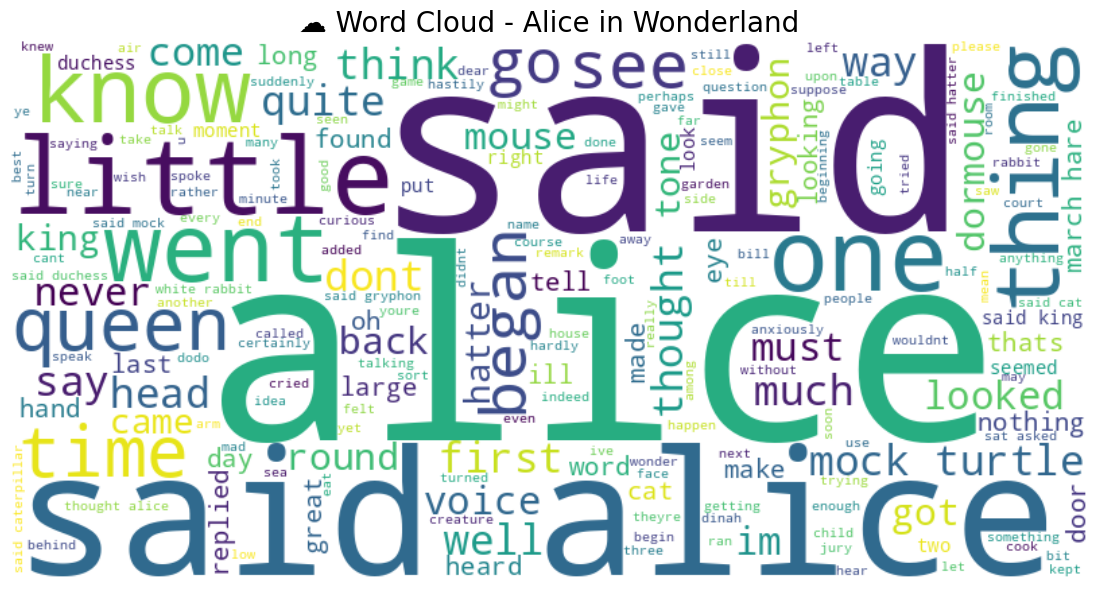

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_for_wordcloud = " ".join(tokens)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("☁️ Word Cloud - Alice in Wonderland", fontsize=20)
plt.show()


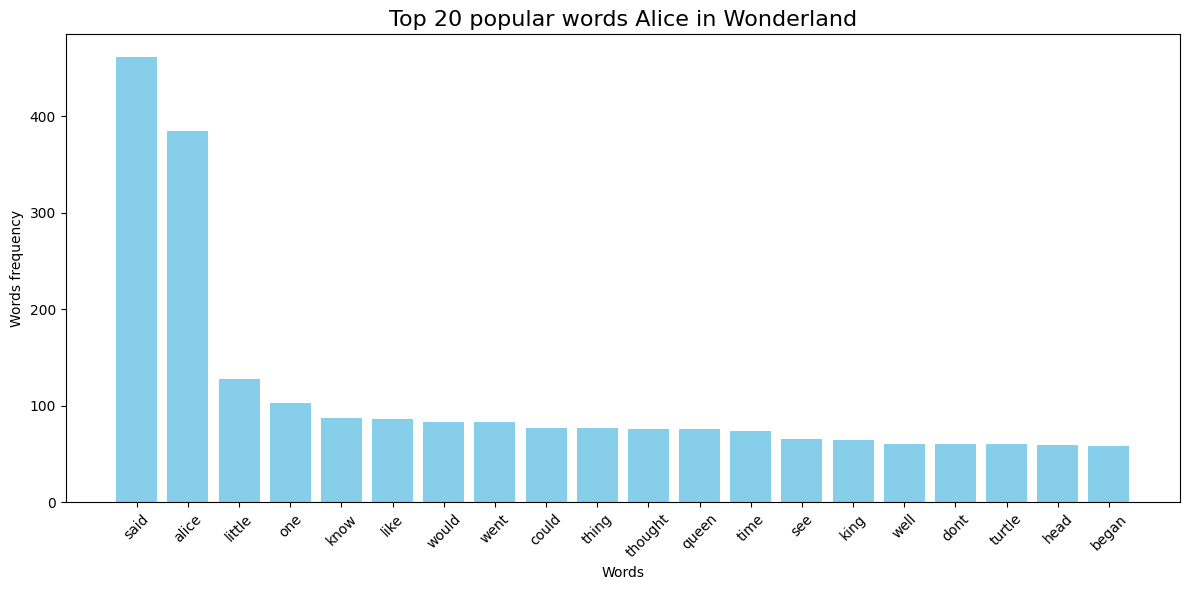

In [81]:
from collections import Counter
freq = Counter(tokens)

top_n = 20
top_words = freq.most_common(top_n)

words, counts = zip(*top_words)

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.title(f"Top {top_n} popular words Alice in Wonderland", fontsize=16)
plt.xlabel("Words")
plt.ylabel("Words frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip


--2025-04-21 03:34:12--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-21 03:34:12--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-21 03:34:12--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [69]:

glove_vectors = {}
with open("glove.6B.100d.txt", "r", encoding="utf-8") as f:
    for line in f:
        values = line.strip().split()
        word = values[0]
        vector = np.array(values[1:], dtype='float32')
        glove_vectors[word] = vector

print("Amount of words in GloVe:", len(glove_vectors))


Amount of words in GloVe: 400000


In [70]:
def embed_text_with_glove(tokens, glove_vectors):
    vecs = [glove_vectors[t] for t in tokens if t in glove_vectors]
    if not vecs:
        return np.zeros(100)
    return np.mean(vecs, axis=0)

text_embedding = embed_text_with_glove(tokens, glove_vectors)


In [71]:
print("Shape of embedding all text:", text_embedding.shape)
print("10 first vector:", text_embedding[:10])


Shape of embedding all text: (100,)
10 first vector: [-0.03212721  0.15570495  0.25022984 -0.21816158 -0.15851529  0.19210793
 -0.09573188  0.15417582  0.01859889 -0.20562562]


In [72]:
from numpy import dot
from numpy.linalg import norm
top_words = [w for w, _ in Counter(tokens).most_common(100) if w in glove_vectors][:30]

def cosine_similarity(a, b):
    return dot(a, b) / (norm(a) * norm(b))

similarities = []
for i, w1 in enumerate(top_words):
    for j, w2 in enumerate(top_words):
        if i < j:
            sim = cosine_similarity(glove_vectors[w1], glove_vectors[w2])
            similarities.append((w1, w2, sim))
similarities.sort(key=lambda x: -x[2])

print("Top Semantic Similarity:")
for w1, w2, score in similarities[:10]:
    print(f"{w1:<10} ↔ {w2:<10} → similarity = {score:.4f}")


Top Semantic Similarity:
would      ↔ could      → similarity = 0.9515
know       ↔ think      → similarity = 0.9224
know       ↔ thought    → similarity = 0.8778
thing      ↔ think      → similarity = 0.8769
know       ↔ thing      → similarity = 0.8709
know       ↔ say        → similarity = 0.8594
thought    ↔ think      → similarity = 0.8585
little     ↔ much       → similarity = 0.8571
one        ↔ time       → similarity = 0.8461
say        ↔ think      → similarity = 0.8439


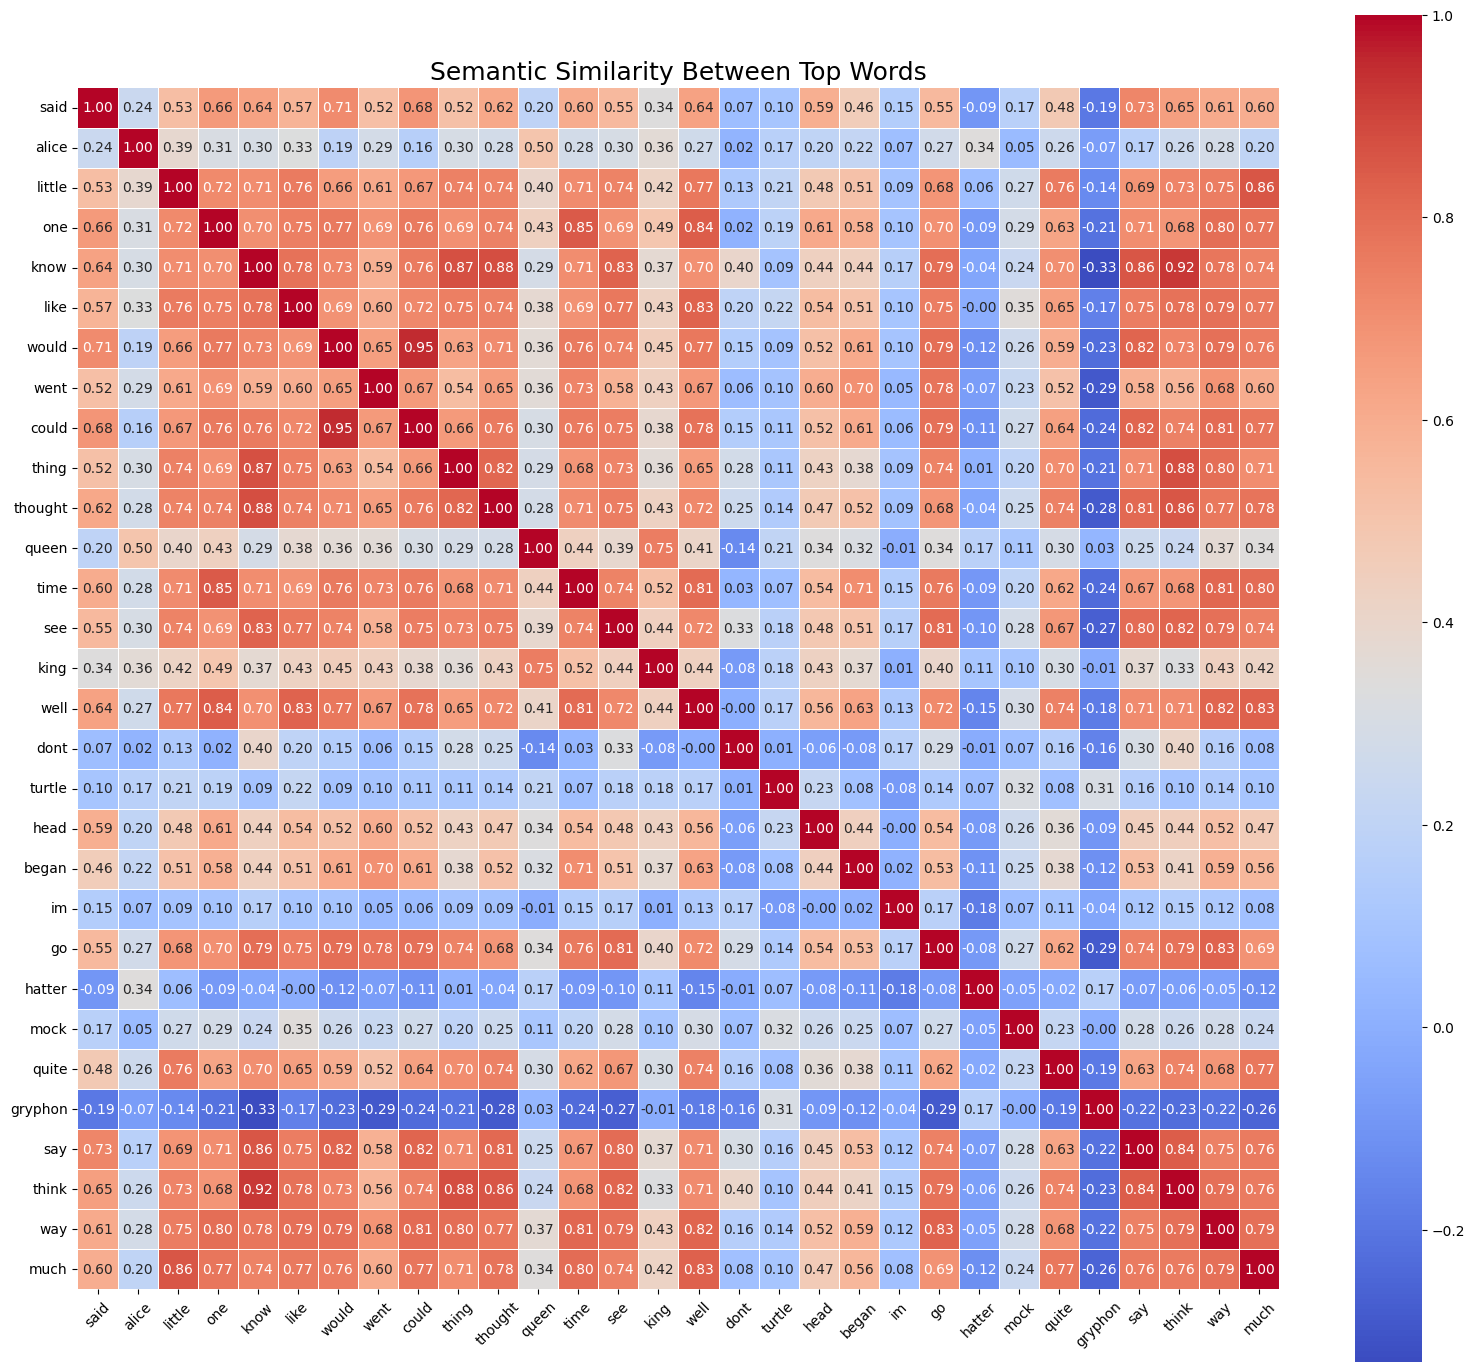

In [75]:
import seaborn as sns

sim_matrix = np.zeros((len(top_words), len(top_words)))
for i in range(len(top_words)):
    for j in range(len(top_words)):
        sim_matrix[i, j] = cosine_similarity(glove_vectors[top_words[i]], glove_vectors[top_words[j]])

plt.figure(figsize=(16, 14))
sns.heatmap(sim_matrix,
            xticklabels=top_words,
            yticklabels=top_words,
            cmap='coolwarm',
            annot=True,
            fmt=".2f",
            linewidths=0.5,
            square=True)
plt.title("Semantic Similarity Between Top Words", fontsize=18)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


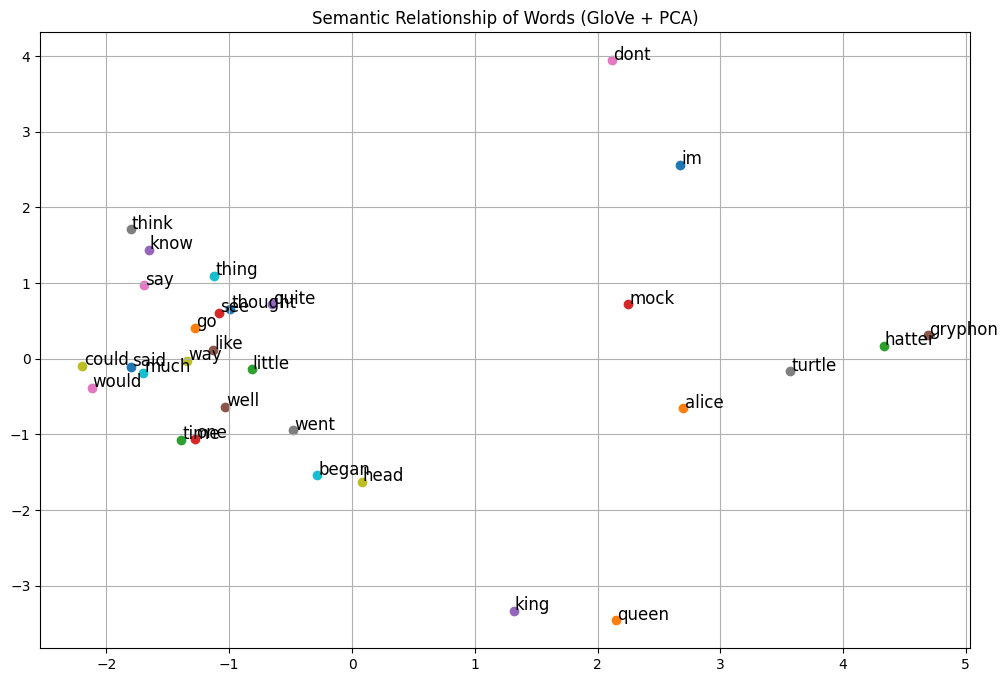

In [74]:
from sklearn.decomposition import PCA
vectors = np.array([glove_vectors[w] for w in top_words])

pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)
plt.figure(figsize=(12, 8))
for i, word in enumerate(top_words):
    x, y = reduced[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=12)

plt.title("Semantic Relationship of Words (GloVe + PCA)")
plt.grid(True)
plt.show()
